# Import Data for Classification

In [10]:
import pandas as pd
import numpy as np
from sklearn import ensemble, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

#Set the risk group you want to look at
data  =  pd.read_csv('./csv_files/data_all_risk.csv')

hr_df = pd.read_csv("./csv_files/hr-data.csv")

#data_y = data['churn']
#data_x = data.drop(columns = ['churn'], inplace=True)

#Drop our polynomial interaction variables we used for clutering, as they didn't 
#impact classification scores by much and they hindered interpretability

data = data.drop(columns = ['satisfaction_level^1xlast_evaluation^1',
       'satisfaction_level^1xaverage_montly_hours^1',
       'satisfaction_level^1xnumber_project^1',
       'satisfaction_level^1xtime_spend_company^1',
       'last_evaluation^1xaverage_montly_hours^1',
       'last_evaluation^1xnumber_project^1',
       'last_evaluation^1xtime_spend_company^1',
       'average_montly_hours^1xnumber_project^1',
       'average_montly_hours^1xtime_spend_company^1',
       'number_project^1xtime_spend_company^1',
       'satisfaction_level^1xlast_evaluation^1xaverage_montly_hours^1',
       'satisfaction_level^1xlast_evaluation^1xnumber_project^1',
       'satisfaction_level^1xlast_evaluation^1xtime_spend_company^1',
       'satisfaction_level^1xaverage_montly_hours^1xnumber_project^1',
       'satisfaction_level^1xaverage_montly_hours^1xtime_spend_company^1',
       'satisfaction_level^1xnumber_project^1xtime_spend_company^1',
       'last_evaluation^1xaverage_montly_hours^1xnumber_project^1',
       'last_evaluation^1xaverage_montly_hours^1xtime_spend_company^1',
       'last_evaluation^1xnumber_project^1xtime_spend_company^1',
       'average_montly_hours^1xnumber_project^1xtime_spend_company^1'])

#Split data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='churn'), data['churn'], test_size = 0.2, random_state=42)

## Random Forest

In [11]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

rf_model =  RandomForestClassifier(random_state = 42)

#Run Random Forest Model with Tuning Grid

# Initialize our tuning grid
param_grid = {
     'ccp_alpha': [ 0.0, 0.01 ],
     'class_weight' : [ 'balanced'],
     'max_depth': [ 5, 10, 15, None],
     'max_features': ['auto'],
     'max_leaf_nodes': [ 10, 12, 14 , None],
     'min_impurity_decrease': [ 0.0, 0.001 ],
     'min_samples_leaf': [ 2, 4, 6],
     'min_samples_split': [ 2, 3, 4, 5 ],
     'min_weight_fraction_leaf': [ 0.0, 0.01 ],
     'n_estimators': [50, 65, 80, 95, 110, 150]
}

#Set the grid search
grid_search = RandomizedSearchCV(rf_model, param_grid, cv=5, verbose=2, random_state=42, n_iter=10, scoring='balanced_accuracy')

#Fit the model
grid_search.fit(X_train, y_train.astype(bool))

print(("best RF from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

y_predict = grid_search.best_estimator_.predict(X_test)

print(classification_report(y_test, y_predict))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=110, min_weight_fraction_leaf=0.01, min_samples_split=3, min_samples_leaf=4, min_impurity_decrease=0.0, max_leaf_nodes=12, max_features=auto, max_depth=15, class_weight=balanced, ccp_alpha=0.01 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=110, min_weight_fraction_leaf=0.01, min_samples_split=3, min_samples_leaf=4, min_impurity_decrease=0.0, max_leaf_nodes=12, max_features=auto, max_depth=15, class_weight=balanced, ccp_alpha=0.01, total=   0.3s
[CV] n_estimators=110, min_weight_fraction_leaf=0.01, min_samples_split=3, min_samples_leaf=4, min_impurity_decrease=0.0, max_leaf_nodes=12, max_features=auto, max_depth=15, class_weight=balanced, ccp_alpha=0.01 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=110, min_weight_fraction_leaf=0.01, min_samples_split=3, min_samples_leaf=4, min_impurity_decrease=0.0, max_leaf_nodes=12, max_features=auto, max_depth=15, class_weight=balanced, ccp_alpha=0.01, total=   0.3s
[CV] n_estimators=110, min_weight_fraction_leaf=0.01, min_samples_split=3, min_samples_leaf=4, min_impurity_decrease=0.0, max_leaf_nodes=12, max_features=auto, max_depth=15, class_weight=balanced, ccp_alpha=0.01 
[CV]  n_estimators=110, min_weight_fraction_leaf=0.01, min_samples_split=3, min_samples_leaf=4, min_impurity_decrease=0.0, max_leaf_nodes=12, max_features=auto, max_depth=15, class_weight=balanced, ccp_alpha=0.01, total=   0.3s
[CV] n_estimators=110, min_weight_fraction_leaf=0.01, min_samples_split=3, min_samples_leaf=4, min_impurity_decrease=0.0, max_leaf_nodes=12, max_features=auto, max_depth=15, class_weight=balanced, ccp_alpha=0.01 
[CV]  n_estimators=110, min_weight_fraction_leaf=0.01, min_samples_split=3, min_samples_leaf=4, min_impurity_decrease=

[CV]  n_estimators=110, min_weight_fraction_leaf=0.01, min_samples_split=3, min_samples_leaf=6, min_impurity_decrease=0.001, max_leaf_nodes=None, max_features=auto, max_depth=5, class_weight=balanced, ccp_alpha=0.01, total=   0.3s
[CV] n_estimators=110, min_weight_fraction_leaf=0.01, min_samples_split=3, min_samples_leaf=6, min_impurity_decrease=0.001, max_leaf_nodes=None, max_features=auto, max_depth=5, class_weight=balanced, ccp_alpha=0.01 
[CV]  n_estimators=110, min_weight_fraction_leaf=0.01, min_samples_split=3, min_samples_leaf=6, min_impurity_decrease=0.001, max_leaf_nodes=None, max_features=auto, max_depth=5, class_weight=balanced, ccp_alpha=0.01, total=   0.3s
[CV] n_estimators=110, min_weight_fraction_leaf=0.01, min_samples_split=3, min_samples_leaf=6, min_impurity_decrease=0.001, max_leaf_nodes=None, max_features=auto, max_depth=5, class_weight=balanced, ccp_alpha=0.01 
[CV]  n_estimators=110, min_weight_fraction_leaf=0.01, min_samples_split=3, min_samples_leaf=6, min_impuri

[CV]  n_estimators=110, min_weight_fraction_leaf=0.01, min_samples_split=2, min_samples_leaf=6, min_impurity_decrease=0.0, max_leaf_nodes=None, max_features=auto, max_depth=None, class_weight=balanced, ccp_alpha=0.0, total=   0.4s
[CV] n_estimators=110, min_weight_fraction_leaf=0.01, min_samples_split=2, min_samples_leaf=6, min_impurity_decrease=0.0, max_leaf_nodes=None, max_features=auto, max_depth=5, class_weight=balanced, ccp_alpha=0.01 
[CV]  n_estimators=110, min_weight_fraction_leaf=0.01, min_samples_split=2, min_samples_leaf=6, min_impurity_decrease=0.0, max_leaf_nodes=None, max_features=auto, max_depth=5, class_weight=balanced, ccp_alpha=0.01, total=   0.3s
[CV] n_estimators=110, min_weight_fraction_leaf=0.01, min_samples_split=2, min_samples_leaf=6, min_impurity_decrease=0.0, max_leaf_nodes=None, max_features=auto, max_depth=5, class_weight=balanced, ccp_alpha=0.01 
[CV]  n_estimators=110, min_weight_fraction_leaf=0.01, min_samples_split=2, min_samples_leaf=6, min_impurity_dec

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   13.4s finished


best RF from grid search: 0.939
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2294
           1       0.94      0.90      0.92       706

    accuracy                           0.96      3000
   macro avg       0.95      0.94      0.95      3000
weighted avg       0.96      0.96      0.96      3000



## AdaBoost

In [12]:
#Run Adaboost classifier

adaBoost = ensemble.AdaBoostClassifier(base_estimator=rf_model, n_estimators=10, random_state=42,
                                       learning_rate=0.5, algorithm='SAMME')

adaBoost.fit(X_train, y_train)

y_predict = adaBoost.predict(X_test)

print(classification_report(y_test, y_predict))



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.98       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



# Gradient Classifier

In [13]:
#Run Gradient Classifer

gradientBoost = ensemble.GradientBoostingClassifier(verbose = 2, random_state = 42)

gradientBoost.fit(X_train, y_train)

y_predict = gradientBoost.predict(X_test)

print(classification_report(y_test, y_predict))

      Iter       Train Loss   Remaining Time 
         1           0.9511            0.94s
         2           0.8437            0.94s
         3           0.7591            0.84s
         4           0.6907            0.83s
         5           0.6334            0.79s
         6           0.5852            0.76s
         7           0.5433            0.73s
         8           0.5075            0.72s
         9           0.4762            0.72s
        10           0.4513            0.73s
        11           0.4271            0.72s
        12           0.4055            0.71s
        13           0.3884            0.69s
        14           0.3716            0.68s
        15           0.3591            0.67s
        16           0.3462            0.65s
        17           0.3387            0.64s
        18           0.3312            0.63s
        19           0.3231            0.62s
        20           0.3174            0.62s
        21           0.3130            0.62s
        2

## XG Boost

In [14]:
#Run XGBoost Classifier

X_rest, X_test, y_rest, y_test = train_test_split(data.drop(columns='churn'), data['churn'],test_size = 0.2, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X_rest, y_rest,test_size = 0.25, random_state=42)


import xgboost as xgb
xgBoost_2 = xgb.XGBClassifier(max_depth=3, 
                            learning_rate=0.01, 
                            colsample_bytree=0.7, 
                            scale_pos_weight=1, 
                            n_estimators=200,
                            n_jobs = -1, 
                            verbosity = 1,
                            random_state = 42)


xgBoost_2.fit(X_train, y_train,
             eval_set = [(X_train, y_train), (X_val, y_val)],
             eval_metric = ['logloss','auc'], # Actually uses objective to determine evaluation
             early_stopping_rounds = 10,
             verbose = True)

y_predict = xgBoost_2.predict(X_test)

print(classification_report(y_test, y_predict))

[0]	validation_0-logloss:0.686598	validation_0-auc:0.908364	validation_1-logloss:0.686462	validation_1-auc:0.904456
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.67909	validation_0-auc:0.968507	validation_1-logloss:0.678917	validation_1-auc:0.965268
[2]	validation_0-logloss:0.671722	validation_0-auc:0.969825	validation_1-logloss:0.671523	validation_1-auc:0.966448
[3]	validation_0-logloss:0.66489	validation_0-auc:0.974264	validation_1-logloss:0.664764	validation_1-auc:0.968082
[4]	validation_0-logloss:0.657788	validation_0-auc:0.974303	validation_1-logloss:0.657629	validation_1-auc:0.968315
[5]	validation_0-logloss:0.650969	validation_0-auc:0.976217	validation_1-logloss:0.650798	validation_1-auc:0.96912
[6]	validation_0-logloss:0.644069	validation_0-auc:0.975877	validation_1-logloss:0.643928	validation_1-auc:0.968136
[7]	validation_0-logloss:0.638481	

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


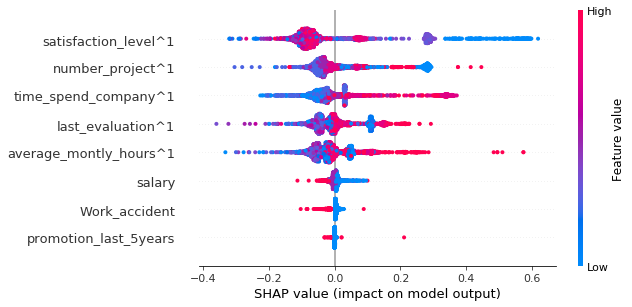

In [15]:
# Look at Shapely values to see our feature importances, using the last adaboost estimator

import shap

rf_explainer = shap.TreeExplainer(adaBoost.estimators_[-1])
rf_shap_values = rf_explainer.shap_values(X_test)

shap.initjs()
shap.force_plot(rf_explainer.expected_value[1],
                rf_shap_values[1],
                feature_names= X_train.columns)

shap.initjs()
shap.summary_plot(rf_shap_values[1],
                  features = X_test, 
                  feature_names = X_train.columns)

# Test Case Johnny

47
[1]


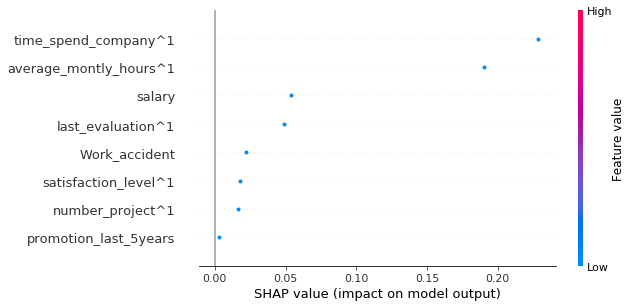

In [16]:
# Choose a random predicted churned employee and see if we can get him to not... 

#rand_emp = np.random.randint(0,300)
#This employee was high risk and churned
rand_emp = 47

print(rand_emp)

#Get his trasformed data
Johnny = X_test.loc[[rand_emp]].copy()

#Get his non-transformed data
Johnny_nontrans = hr_df.loc[Johnny.index]

#Predict his churn
J_predict = adaBoost.predict(Johnny)

print(J_predict)

#Show his feature importances

rf_shap_values_all = rf_explainer.shap_values(X_test)
rf_shap_values = rf_explainer.shap_values(Johnny)

shap.initjs()
shap.force_plot(rf_explainer.expected_value[1],
                rf_shap_values_all[1],
                feature_names= X_train.columns)

shap.initjs()
shap.summary_plot(rf_shap_values[1],
                  features = Johnny, 
                  feature_names = X_train.columns)

#rf_shap_values

In [17]:
Johnny_nontrans = hr_df.loc[Johnny.index]

#Show non-transformed data
print(Johnny_nontrans)

    id  satisfaction_level  last_evaluation  number_project  \
47  47                0.57              0.7               3   

    average_montly_hours  time_spend_company  Work_accident  churn  \
47                   273                   6              0      1   

    promotion_last_5years    sales salary  
47                      0  support    low  


In [18]:
rf_shap_values[1]

#Get his shapely values, features
John_Shap = pd.DataFrame(rf_shap_values[1].T, index = Johnny.columns,columns=['Johnny'])    
    
Johnny

,satisfaction_level^1,last_evaluation^1,average_montly_hours^1,number_project^1,time_spend_company^1,salary,Work_accident,promotion_last_5years
47,-0.172283,-0.094072,1.440681,-0.651538,1.713436,0.0,0.0,0.0


In [19]:
#Find most important features

John_Shap.sort_values(by='Johnny',ascending=False)

John_Shap.drop(index=['time_spend_company^1','Work_accident'],inplace=True)

John_Shap = John_Shap.sort_values(by='Johnny',ascending=False)

John_Shap

,Johnny
average_montly_hours^1,0.190381
salary,0.053899
last_evaluation^1,0.048766
satisfaction_level^1,0.017676
number_project^1,0.016478
promotion_last_5years,0.003135


In [20]:
X_means = np.mean(X_test)

print(X_means)

#What are the group means

satisfaction_level^1      0.001487
last_evaluation^1        -0.002464
average_montly_hours^1    0.002009
number_project^1         -0.010591
time_spend_company^1     -0.009292
salary                    0.593000
Work_accident             0.145000
promotion_last_5years     0.018333
dtype: float64


In [21]:
# loop through each of the features, perturbing until prediction returns non-churn...
# Increase size of perturbation sequentially

Johnny_Copy = Johnny.copy()

import itertools

#Search space for changing the features
model_iterator = itertools.product([0,-0.1,0.1,-0.2,0.2], [0,-0.1,0.1,-0.2,0.2],[0,-0.1,0.1,-0.2,0.2])

feat_1 = John_Shap.iloc[0].name
feat_2 = John_Shap.iloc[1].name
feat_3 = John_Shap.iloc[2].name

for a,b,c in model_iterator:
    
    #print(Johnny[feat_1])
    
    Johnny_Copy[feat_1] = Johnny[feat_1] + c
    Johnny_Copy[feat_2] = Johnny[feat_2] + b
    Johnny_Copy[feat_3] = Johnny[feat_3] + a
    
    #print(Johnny_Copy[feat_1])
    
    J_predict = adaBoost.predict(Johnny_Copy)
    
    print(a,b,c,J_predict)
    
    if J_predict == 0:
        break

0 0 0 [1]
0 0 -0.1 [0]


In [23]:
#Get the means/stds from the original data

orig_mean = pd.read_csv('./csv_files/orig_mean.csv')
orig_std = pd.read_csv('./csv_files/orig_std.csv')

In [24]:
orig_mean

,Unnamed: 0,0
0,satisfaction_level,0.612834
1,last_evaluation,0.716102
2,number_project,3.803054
3,average_montly_hours,201.050337
4,time_spend_company,3.498233
5,Work_accident,0.144610
6,churn,0.238083
7,promotion_last_5years,0.021268
8,salary,0.594706


In [25]:
orig_std

,Unnamed: 0,0
0,satisfaction_level,0.248631
1,last_evaluation,0.171169
2,number_project,1.232592
3,average_montly_hours,49.943099
4,time_spend_company,1.460136
5,Work_accident,0.351719
6,churn,0.425924
7,promotion_last_5years,0.144281
8,salary,0.594706


In [26]:
#Use our original mean/std values to convert transformed values back to real values

Orig_Value = 1.4406  # Johnny's transformed average mothly hours (see cell 18)
Change = -0.1        # Value needed go from stay to leave (See cell 21)

#Convert Average monthly hours back to real value with the change included
New_Value = ((Orig_Value+Change) * 49.9) + 201.05 

New_Value

267.94594